In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pyarrow as pa
import pyarrow.parquet as pq

# load
phishing = pq.read_table('floor/phishing.parquet')
benign_u = pq.read_table('floor/benign.parquet')

from transformers.drop_nontrain import drop_nontrain
phishing = drop_nontrain(phishing)
benign_u = drop_nontrain(benign_u)

phishing_order = phishing.schema.names
benign = benign_u.select(phishing_order)

data = pa.concat_tables([phishing, benign])
df = data.to_pandas()

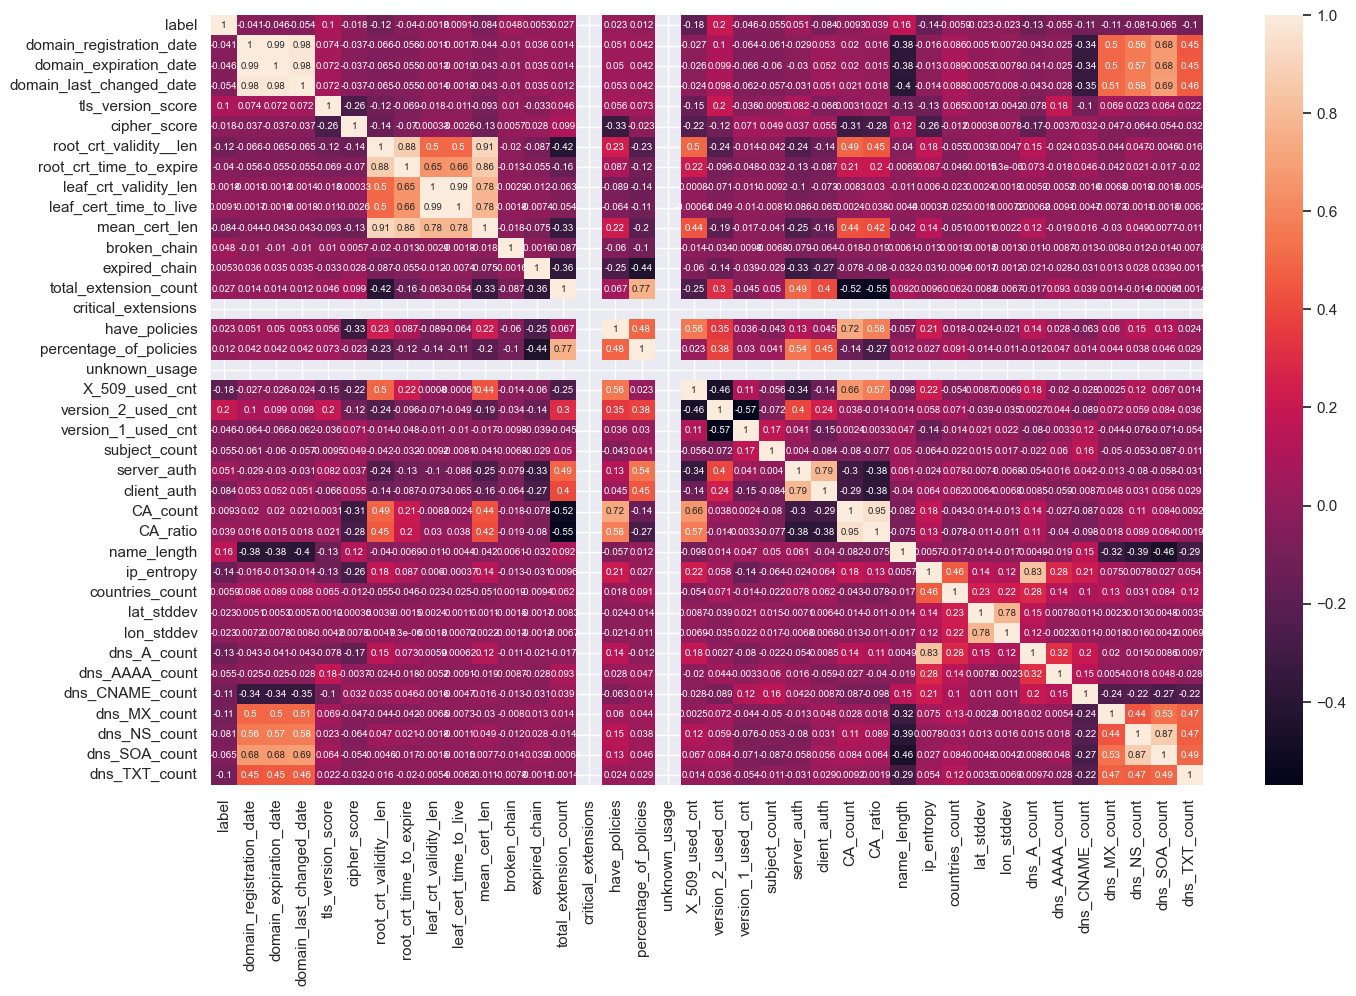

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_coded = df.copy()
df_coded['label'] = le.fit_transform(df_coded['label'])

sns.set(rc={'figure.figsize':(16,10)})
corrMatrix = df_coded.corr()
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 7})
plt.show()

In [16]:
#sns.pairplot(df[["label", "dns_NS_count", "dns_SOA_count", "countries_count", "leaf_cert_valid_len"]], hue='label')